In [50]:
import numpy as np
import matplotlib.pyplot as plt
tf = 30.05
dt = 0.05
t = np.arange(0,tf,dt)

#6,28 Rad/s Resposta

In [51]:
Ke = Kt = 0.01
J = 0.01
b = 0.019
R = 1
L = 0.5

<h1>Questão 1</h1>
Letra A

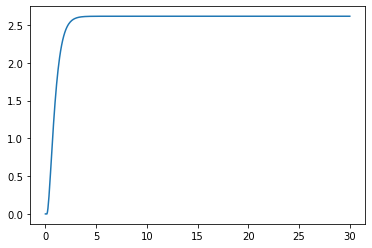

In [52]:
V= 5.0
Tp=np.zeros(np.size(t))
Tpp=np.zeros(np.size(t))
i=np.zeros(np.size(t))
ip=np.zeros(np.size(t))
for k in range(0, (np.size(t)-1)):
    Tpp[k+1]=(1/J)*(Ke*i[k]-b*Tp[k])
    Tp[k+1]=Tp[k]+Tpp[k]*dt

    ip[k+1]=(1/L)*(V-R*i[k]-Kt*Tp[k])
    i[k+1]=i[k]+ip[k]*dt
plt.plot(t,Tp)

<h1>Questão 1</h1>
Letra B

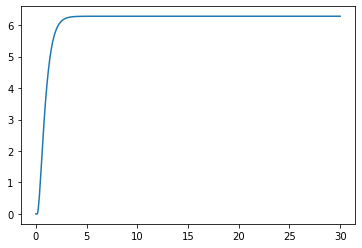

In [53]:
V= 12.0
Tp=np.zeros(np.size(t))
Tpp=np.zeros(np.size(t))
i=np.zeros(np.size(t))
ip=np.zeros(np.size(t))
for k in range(0, (np.size(t)-1)):
    Tpp[k+1]=(1/J)*(Ke*i[k]-b*Tp[k])
    Tp[k+1]=Tp[k]+Tpp[k]*dt

    ip[k+1]=(1/L)*(V-R*i[k]-Kt*Tp[k])
    i[k+1]=i[k]+ip[k]*dt
plt.plot(t,Tp)

Não é possivel exigir 3 $\pi rad/s$ pois a velocidade máxima é de  2 $\pi rad/s$

# **Questão 2**
 * A resposta não é instantânea.
 * Aproximadamene 10s.
 * Pode-se usar tecnicas como PWM chaveando pontes H ou outros circuitos de acionamento de potência.

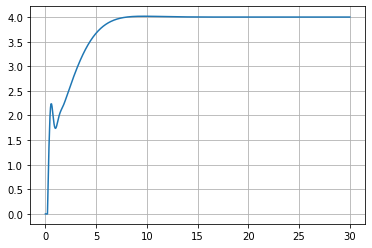

In [54]:
Kp=1.0
Ki=1
Kd=1.1
Sp=4.0
V= 0.0
erro=0.0
erro_old=0
erro_int=0

Tp=np.zeros(np.size(t))
Tpp=np.zeros(np.size(t))
i=np.zeros(np.size(t))
ip=np.zeros(np.size(t))
for k in range(0, (np.size(t)-1)):
    Tpp[k+1]=(1/J)*(Ke*i[k]-b*Tp[k])
    Tp[k+1]=Tp[k]+Tpp[k]*dt

    erro=Sp-Tp[k]
    ip[k+1]=(1/L)*(V-R*i[k]-Kt*Tp[k])
    i[k+1]=i[k]+ip[k]*dt
    V=erro*Kp+erro_int*Ki+((erro-erro_old)/dt)*Kd
    erro_old=erro
    erro_int+=erro*dt
plt.plot(t,Tp)
plt.grid()

# **Questão 3**

2.857142857142857 2.857142857142857


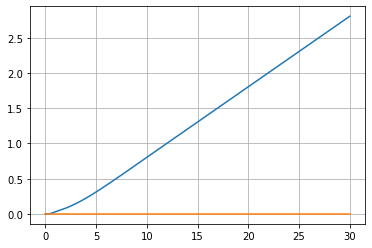

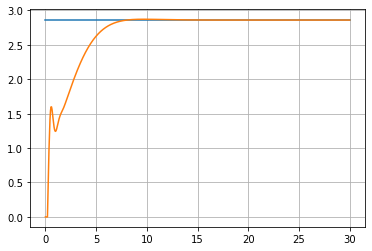

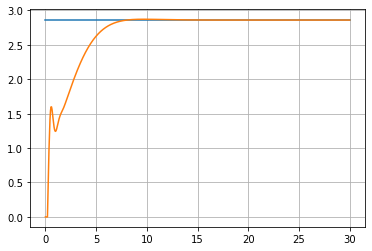

In [72]:
#Parametros do robo
u=0.1
w=0.0
R2=0.035
L2=0.28

#Parametros do motor
Ke = Kt = 0.01
J = 0.01
b = 0.019
R = 1
L = 0.5

#Velocidades das rodas
wd=(2*u+w*L2)/(2*R2)
we=(2*u-w*L2)/(2*R2)

#parametros do PID
Kp=1.0
Ki=1
Kd=1.1
Sp_d=wd
Sp_e=we
print(Sp_d,Sp_e)
V_d= 0.0
V_e= 0.0
erro_d=0.0
erro_e=0.0
erro_old_d=0
erro_old_e=0
erro_int_d=0
erro_int_e=0

Tp_d=np.zeros(np.size(t))
Tp_e=np.zeros(np.size(t))
Tpp_d=np.zeros(np.size(t))
Tpp_e=np.zeros(np.size(t))
i_d=np.zeros(np.size(t))
i_e=np.zeros(np.size(t))
ip_d=np.zeros(np.size(t))
ip_e=np.zeros(np.size(t))
sp_v_d=Sp_d*np.ones(np.size(t))
sp_v_e=Sp_e*np.ones(np.size(t))


x=np.zeros(np.size(t))
xp=np.zeros(np.size(t))
y=np.zeros(np.size(t))
yp=np.zeros(np.size(t))
f=np.zeros(np.size(t))
fp=np.zeros(np.size(t))


for k in range(0, (np.size(t)-1)):
    Tpp_d[k+1]=(1/J)*(Ke*i_d[k]-b*Tp_d[k])
    Tpp_e[k+1]=(1/J)*(Ke*i_e[k]-b*Tp_e[k])
    Tp_d[k+1]=Tp_d[k]+Tpp_d[k]*dt
    Tp_e[k+1]=Tp_e[k]+Tpp_e[k]*dt
    erro_d=Sp_d-Tp_d[k]
    erro_e=Sp_e-Tp_e[k]
    ip_d[k+1]=(1/L)*(V_d-R*i_d[k]-Kt*Tp_d[k])
    ip_e[k+1]=(1/L)*(V_e-R*i_e[k]-Kt*Tp_e[k])
    i_d[k+1]=i_d[k]+ip_d[k]*dt
    i_e[k+1]=i_e[k]+ip_e[k]*dt
    V_d=erro_d*Kp+erro_int_d*Ki+((erro_d-erro_old_d)/dt)*Kd
    V_e=erro_e*Kp+erro_int_e*Ki+((erro_e-erro_old_e)/dt)*Kd
    erro_old_d=erro_d
    erro_old_e=erro_e
    erro_int_d+=erro_d*dt
    erro_int_e+=erro_e*dt
    xp[k+1]=(R2/2)*(Tp_e[k]+Tp_d[k])*np.cos(f[k])
    yp[k+1]=(R2/2)*(Tp_e[k]+Tp_d[k])*np.sin(f[k])
    fp[k+1]=(R2/2)*(Tp_d[k]-Tp_e[k])
    
    x[k+1]=x[k]+xp[k]*dt
    y[k+1]=y[k]+yp[k]*dt
    f[k+1]=f[k]+fp[k]*dt



plt.plot(t,x, t,y)
plt.grid()
plt.figure()
plt.plot(t,sp_v_d, t,Tp_d)
plt.grid()
plt.figure()
plt.plot(t,sp_v_e, t,Tp_e)
plt.grid()